# COVID-19 Time Series CSV Analysis US

In [1]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

import urllib.request

#See:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#Download the latest CSV file
urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv','Documents/time_series_covid19_confirmed_global.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv','Documents/time_series_covid19_deaths_global.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv','Documents/time_series_covid19_recovered_global.csv')


('Documents/time_series_covid19_recovered_global.csv',
 <http.client.HTTPMessage at 0x1ed734e6c08>)

In [2]:
time_series_file = "Documents/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(time_series_file)

time_series_file_d = "Documents/time_series_covid19_deaths_global.csv"
df_d = pd.read_csv(time_series_file_d)

time_series_file_r = "Documents/time_series_covid19_recovered_global.csv"
df_r = pd.read_csv(time_series_file_r)


print(df.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  \
0        0        0        0  ...      170      174     237     273     281   
1        0        0        0  ...      223      243     259     277     304   
2        0        0        0  ...      584      716     847     986    1171   
3        0        0        0  ...      370      376     390     428     439   
4        0        0        0  ...        7        7       8       8       8   

   4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  


In [3]:
df.set_index(['Province/State', 'Country/Region'])

Lat       Long  \
Province/State              Country/Region                               
NaN                         Afghanistan            33.00000  65.000000   
                            Albania                41.15330  20.168300   
                            Algeria                28.03390   1.659600   
                            Andorra                42.50630   1.521800   
                            Angola                -11.20270  17.873900   
...                                                     ...        ...   
Falkland Islands (Malvinas) United Kingdom        -51.79630 -59.523600   
Saint Pierre and Miquelon   France                 46.88520 -56.315900   
NaN                         South Sudan             6.87700  31.307000   
                            Western Sahara         24.21550 -12.885800   
                            Sao Tome and Principe   0.18636   6.613081   

                                                   1/22/20  1/23/20  1/24/20  \
Province/State              Country/Region                                     
NaN                         Afghanistan                  0        0        0   
                            Albania                      0        0        0   
                            Algeria                      0        0        0   
                            Andorra                      0        0        0   
                            Angola                       0        0        0   
...                                                    ...      ...      ...   
Falkland Islands (Malvinas) United Kingdom               0        0        0   
Saint Pierre and Miquelon   France                       0        0        0   
NaN                         South Sudan                  0        0        0   
                            Western Sahara               0        0        0   
                            Sao Tome and Principe        0        0        0   

                                                   1/25/20  1/26/20  1/27/20  \
Province/State              Country/Region                                     
NaN                         Afghanistan                  0        0        0   
                            Albania                      0        0        0   
                            Algeria                      0        0        0   
                            Andorra                      0        0        0   
                            Angola                       0        0        0   
...                                                    ...      ...      ...   
Falkland Islands (Malvinas) United Kingdom               0        0        0   
Saint Pierre and Miquelon   France                       0        0        0   
NaN                         South Sudan                  0        0        0   
                            Western Sahara               0        0        0   
                            Sao Tome and Principe        0        0        0   

                                                   1/28/20  1/29/20  ...  \
Province/State              Country/Region                           ...   
NaN                         Afghanistan                  0        0  ...   
                            Albania                      0        0  ...   
                            Algeria                      0        0  ...   
                            Andorra                      0        0  ...   
                            Angola                       0        0  ...   
...                                                    ...      ...  ...   
Falkland Islands (Malvinas) United Kingdom               0        0  ...   
Saint Pierre and Miquelon   France                       0        0  ...   
NaN                         South Sudan                  0        0  ...   
                            Western Sahara               0        0  ...   
                            Sao Tome and Principe        0        0  ...   

                      

In [4]:
#Read the dates from the headers
headers = list(df.columns.values)
del headers[0:43]
print(headers)

['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20']


In [5]:
df.loc[df['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,161837,188172,213372,243616,275586,308850,337072,366667,396223,429052


In [6]:
rownum = df.loc[df['Country/Region'] == 'US'].index[0]
rownum_d = df_d.loc[df['Country/Region'] == 'US'].index[0]
rownum_r = df_r.loc[df['Country/Region'] == 'US'].index[0]
print(rownum, rownum_d, rownum_r)

225 225 225


In [7]:
#dates = ['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20']
#cases = df.loc[226, '3/1/20':'3/22/20']
dates = headers[:]
cases = df.loc[rownum, dates[0]:dates[-1]]
deaths = df_d.loc[rownum_d, dates[0]:dates[-1]]
recoveries = df_r.loc[rownum_r, dates[0]:dates[-1]]
state = df.loc[rownum, 'Province/State':'Country/Region']

active = []
idx = 0
for case in cases:
    casesum = case;
    deathsum = deaths[idx]
    recoverysum = recoveries[idx]
    active.append(casesum - (deathsum + recoverysum))
    idx = idx + 1
    
print(state,dates,cases,deaths,recoveries)


Province/State    NaN
Country/Region     US
Name: 225, dtype: object ['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20'] 3/1/20         74
3/2/20         98
3/3/20        118
3/4/20        149
3/5/20        217
3/6/20        262
3/7/20        402
3/8/20        518
3/9/20        583
3/10/20       959
3/11/20      1281
3/12/20      1663
3/13/20      2179
3/14/20      2727
3/15/20      3499
3/16/20      4632
3/17/20      6421
3/18/20      7783
3/19/20     13747
3/20/20     19273
3/21/20     25600
3/22/20     33276
3/23/20     43847
3/24/20     53740
3/25/20     65778
3/26/20     83836
3/27/20    101657
3/28/20    121478
3/29/20    140

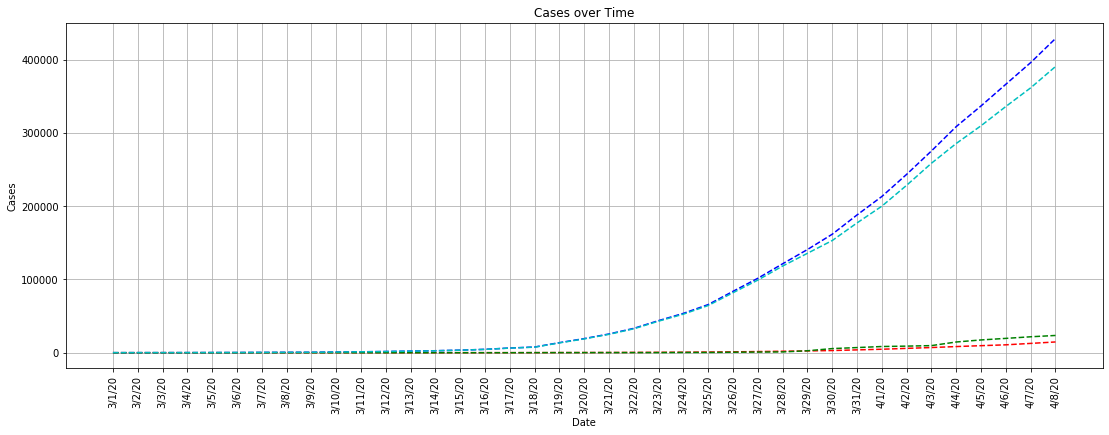

In [8]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0,0,0.8,0.8])

axes.plot(dates, cases, 'b--') 
axes.plot(dates, deaths, 'r--') 
axes.plot(dates, recoveries, 'g--') 
axes.plot(dates, active, 'c--') 
plt.title('Cases over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [9]:
datetimes = [pd.to_datetime(date, infer_datetime_format=True).dayofyear for date in dates]
print(datetimes)

[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [10]:
x = np.array(datetimes)
y = np.array(cases)
y_d = np.array(deaths)
y_r = np.array(recoveries)
y_a = np.array(active)
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
y_d = y_d.reshape(len(y_d),1)
y_r = y_r.reshape(len(y_r),1)
y_a = y_a.reshape(len(y_a),1)

#print(x,y)

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_trainp, x_testp, y_trainp, y_testp = train_test_split(x, y, test_size=0.2, random_state=0)

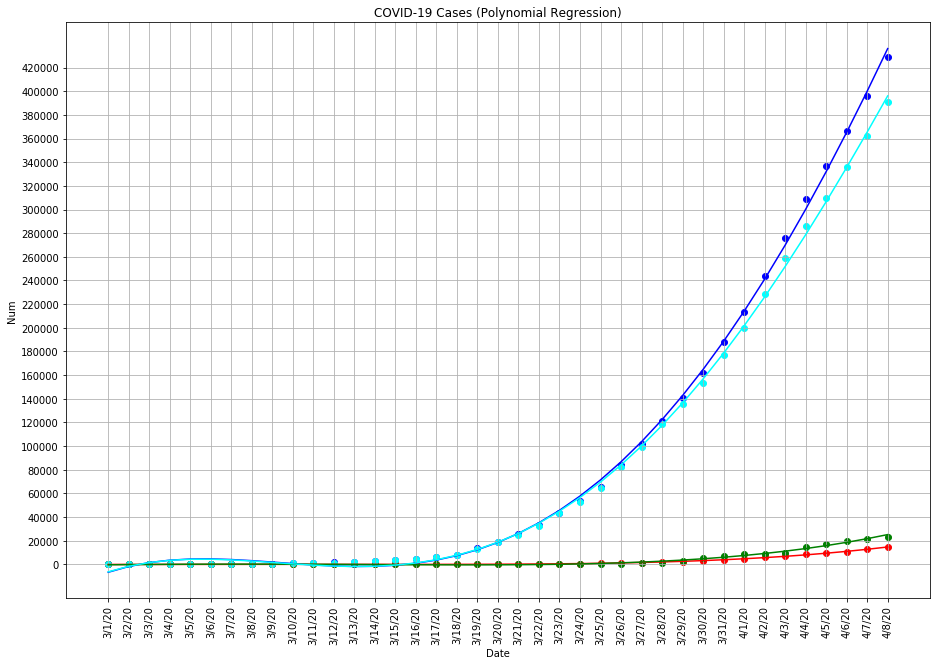

In [12]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#All Cases
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

#Deaths
poly_reg_d = PolynomialFeatures(degree=4)
x_poly_d = poly_reg_d.fit_transform(x)
pol_reg_d = LinearRegression()
pol_reg_d.fit(x_poly_d, y_d)

#Recovieries
poly_reg_r = PolynomialFeatures(degree=4)
x_poly_r = poly_reg_r.fit_transform(x)
pol_reg_r = LinearRegression()
pol_reg_r.fit(x_poly_r, y_r)

#Active
poly_reg_a = PolynomialFeatures(degree=4)
x_poly_a = poly_reg_a.fit_transform(x)
pol_reg_a = LinearRegression()
pol_reg_a.fit(x_poly_a, y_a)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(dates, y, color='blue')
    axes.scatter(dates, y_d, color='red')
    axes.scatter(dates, y_r, color='green')
    axes.scatter(dates, y_a, color='cyan')
    axes.plot(dates, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    axes.plot(dates, pol_reg_d.predict(poly_reg_d.fit_transform(x)), color='red')
    axes.plot(dates, pol_reg_r.predict(poly_reg_r.fit_transform(x)), color='green')
    axes.plot(dates, pol_reg_a.predict(poly_reg_a.fit_transform(x)), color='cyan')
    #axes.ticklabel_format(useOffset=False, style='plain')    
    plt.title('COVID-19 Cases (Polynomial Regression)')
    plt.xlabel('Date')
    plt.ylabel('Num')
    axes.set_yticks(np.arange(0, cases[-1] + 10000, 20000))
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()
    return
viz_polymonial()

In [13]:
# Polymonial Regression Prediction
dt = pd.to_datetime('05/01/2020', infer_datetime_format=True).dayofyear
prediction_dt = pol_reg.predict(poly_reg.fit_transform([[dt]]))
print("Prediction 05/01: {0:,}".format(int(prediction_dt[0,0])))

Prediction 05/01: 1,312,790


In [14]:
# Polymonial Regression Prediction
dt = pd.to_datetime('06/01/2020', infer_datetime_format=True).dayofyear
prediction_dt = pol_reg.predict(poly_reg.fit_transform([[dt]]))
print("Prediction 06/01:  {0:,}".format(int(prediction_dt[0,0])))

Prediction 06/01:  -1,406,392


In [15]:
import datetime

#Add more days and predictions per day to the arrays and plot display
casesfuture = cases.values
deathsfuture = deaths.values
recoveriesfuture = recoveries.values
activefuture = active[:]

datetimesfuture = datetimes[:]
datesfuture = [pd.to_datetime(date, infer_datetime_format=True) for date in dates]
nowstart = datesfuture[-1].strftime("%m/%d/%Y")
nowend = (datesfuture[-1] + datetime.timedelta(days=1)).strftime("%m/%d/%Y")

prevdeath = 0
prevrecov = 0

for dayofyear in range(datetimes[-1] + 1, datetimes[-1] + 30):
    datetimesfuture.append(dayofyear)
    datesfuture.append(datesfuture[-1] + datetime.timedelta(days=1)) 
    numpredict = int(pol_reg.predict(poly_reg.fit_transform([[dayofyear]])).item(0,0))
    numpredict_d = int(pol_reg_d.predict(poly_reg_d.fit_transform([[dayofyear]])).item(0,0))
    numpredict_r = int(pol_reg_r.predict(poly_reg_r.fit_transform([[dayofyear]])).item(0,0))
    #numpredict_a = int(pol_reg_a.predict(poly_reg_a.fit_transform([[dayofyear]])).item(0,0))
    if numpredict <= 0.0:
        numpredict = 0.0
    casesfuture = np.append(casesfuture, numpredict) 
    
    #Total deaths can't go down
    if numpredict_d < prevdeath:
        numpredict_d = prevdeath
    deathsfuture = np.append(deathsfuture, numpredict_d)
    prevdeath = numpredict_d    
    
    #Total recoveries can't go down
    if numpredict_r < prevrecov:
        numpredict_r = prevrecov
    recoveriesfuture = np.append(recoveriesfuture, numpredict_r)
    prevrecov = numpredict_r   
    
    active = numpredict - (numpredict_d + numpredict_r)
    if active <= 0.0:
        active = 0.0
    activefuture.append(active)
    if numpredict <= 0.0:
        break   

# Convert all datetimes to strings for xlabel
datesfuture[:] = [date.strftime("%m/%d/%Y") for date in datesfuture]
    
print(datesfuture, datetimesfuture, casesfuture, deathsfuture, recoveriesfuture)

['03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020', '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020', '04/25/2020', '04/26/2020', '04/27/2020', '04/28/2020', '04/29/2020', '04/30/2020', '05/01/2020', '05/02/2020', '05/03/2020', '05/04/2020', '05/05/2020', '05/06/2020', '05/07/2020'] [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72

In [16]:
xfd = np.array(datesfuture)
xfd = xfd.reshape(len(xfd),1)

xf = np.array(datetimesfuture)
xf = xf.reshape(len(xf),1)

yf = np.array(casesfuture)
yf = yf.reshape(len(yf),1)

yf_d = np.array(deathsfuture)
yf_d = yf_d.reshape(len(yf_d),1)

yf_r = np.array(recoveriesfuture)
yf_r = yf_r.reshape(len(yf_r),1)

yf_a = np.array(activefuture)
yf_a = yf_a.reshape(len(yf_a),1)

In [17]:
# Splitting the dataset into the Training set and Test set
xf_trainp, xf_testp, yf_trainp, yf_testp = train_test_split(xf, yf, test_size=0.2, random_state=0)

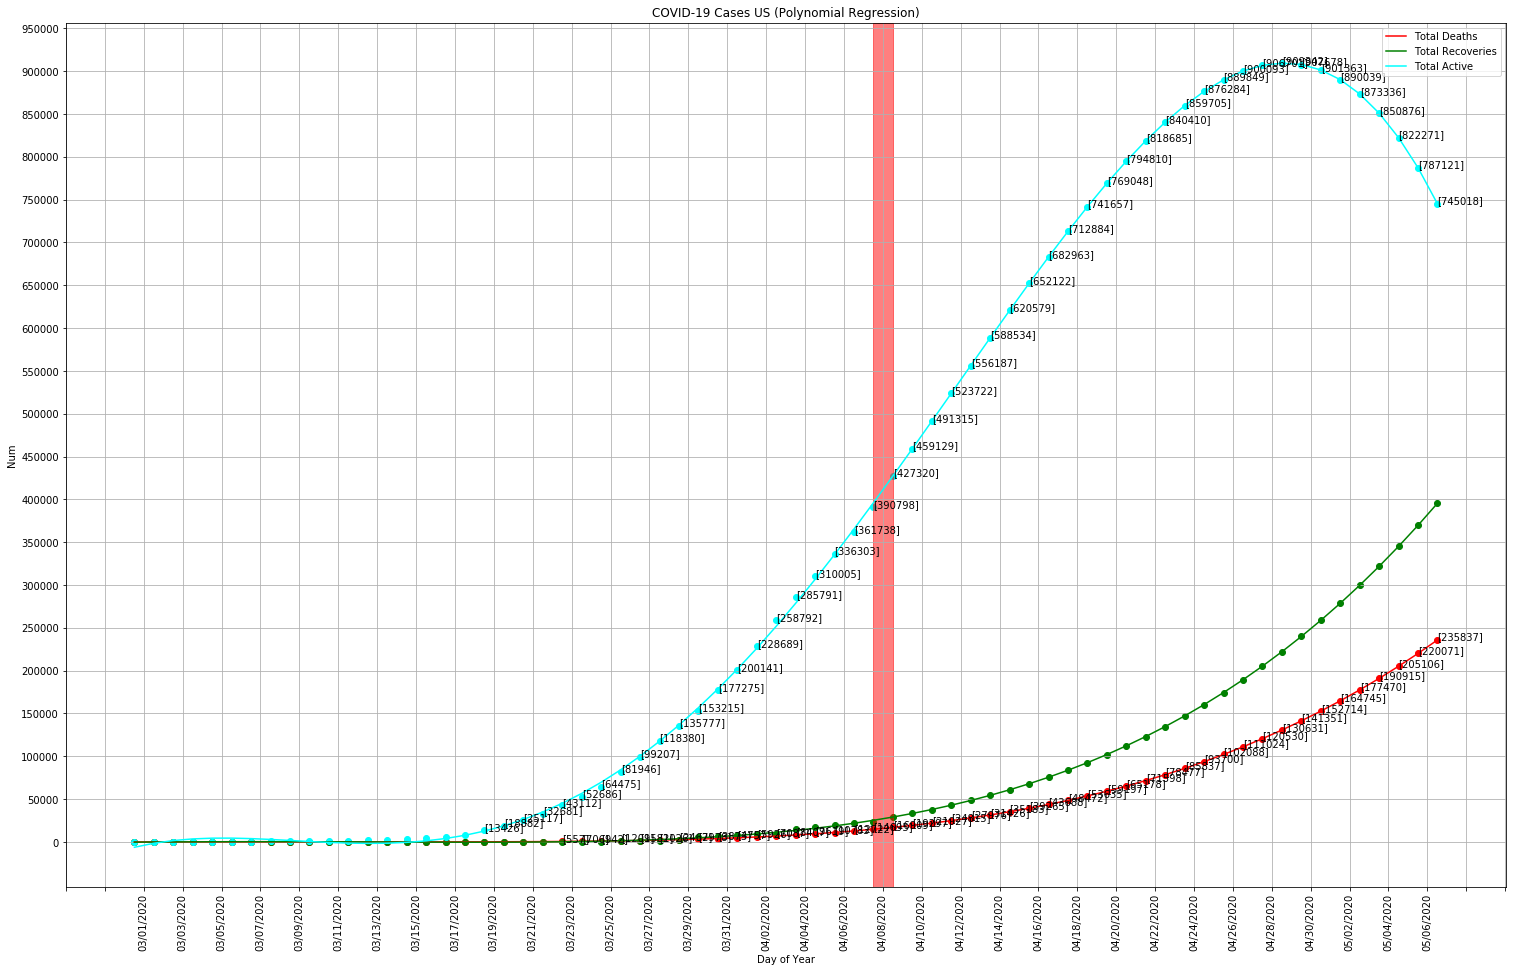

In [19]:
# Fitting Polynomial Regression to the dataset
poly_regf = PolynomialFeatures(degree=4)
x_polyf = poly_regf.fit_transform(xf)
pol_regf = LinearRegression()
pol_regf.fit(x_polyf, yf)

#Deaths
poly_regf_d = PolynomialFeatures(degree=4)
x_polyf_d = poly_regf_d.fit_transform(xf)
pol_regf_d = LinearRegression()
pol_regf_d.fit(x_polyf_d, yf_d)

#Recoveries
poly_regf_r = PolynomialFeatures(degree=4)
x_polyf_r = poly_regf_r.fit_transform(xf)
pol_regf_r = LinearRegression()
pol_regf_r.fit(x_polyf_r, yf_r)

#Active
poly_regf_a = PolynomialFeatures(degree=4)
x_polyf_a = poly_regf_a.fit_transform(xf)
pol_regf_a = LinearRegression()
pol_regf_a.fit(x_polyf_a, yf_a)

# Visualizing the Polymonial Regression results
def vizf_polymonial():
    fig = plt.figure(figsize=(25,15))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    #axes.scatter(datesfuture, yf, color='blue')
    axes.scatter(datesfuture, yf_d, color='red')
    axes.scatter(datesfuture, yf_r, color='green')
    axes.scatter(datesfuture, yf_a, color='cyan')
    #axes.plot(datesfuture, pol_regf.predict(poly_regf.fit_transform(xf)), color='blue', label='Total Confirmed')
    axes.plot(datesfuture, pol_regf_d.predict(poly_regf_d.fit_transform(xf)), color='red', label='Total Deaths')
    axes.plot(datesfuture, pol_regf_r.predict(poly_regf_r.fit_transform(xf)), color='green', label='Total Recoveries')
    axes.plot(datesfuture, pol_regf_a.predict(poly_regf_a.fit_transform(xf)), color='cyan', label='Total Active')
    axes.legend()
    #axes.ticklabel_format(useOffset=False, style='plain')
    plt.title('COVID-19 Cases US (Polynomial Regression)')
    plt.xlabel('Day of Year')
    plt.ylabel('Num')
    axes.set_yticks(np.arange(0, max(casesfuture) - 400000, 50000))
    plt.grid()
    start, end = axes.get_xlim()
    stepsize = 2
    axes.xaxis.set_ticks(np.arange(start, end, stepsize))
    plt.xticks(rotation=90)
    plt.axvspan(nowstart, nowend, color='red', alpha=0.5)
    
    for i,j in zip(datesfuture,yf_a):
        if j > 10000:
            axes.annotate(str(j),xy=(i,j))
    for i,j in zip(datesfuture,yf_d):
        if j > 500:
            axes.annotate(str(j),xy=(i,j))     
    
    plt.show()
    return
vizf_polymonial()